In [1]:
import matplotlib.pyplot as plt
from scipy.stats import pareto
import numpy as np

## Example of ROC curve

This is an example of a ROC curve only for didactic purposes (see Section 2.2 of SNGuess article).

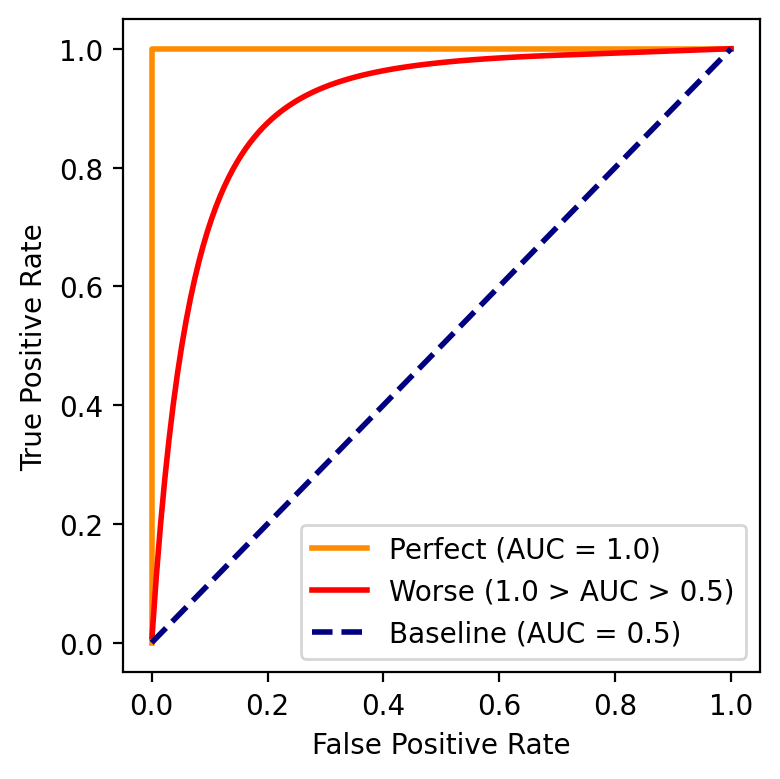

In [4]:
fig, ax = plt.subplots(dpi=200, figsize=(4,4))
lw = 2

# Perfect performance
plt.plot(
    [0.0,0.0,1.0],
    [0.0,1.0,1.0],
    color="darkorange",
    lw=lw,
    label="Perfect (AUC = 1.0)", 
)

# We use a pareto cumulative distribution to simulate a less-than-perfect performance
b = 3
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(0.99, b), 100)
y = pareto.cdf(x, b, 0, 1)

plt.plot(
    np.append((x-1)/5, 1.0),
    np.append(y,1.0),
    color="red",
    lw=lw,
    label="Worse (1.0 > AUC > 0.5)",
)

# Baseline performance (flipping a coin)
plt.plot([0, 1], [0, 1],                                 
         color="navy", 
         lw=lw, 
         linestyle="--", 
         label='Baseline (AUC = 0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.pdf")